In [1]:
import pandas as pd 
import numpy as np 
import lightgbm as lgb
from lightgbm.sklearn import LGBMRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from Dataloader import Dataloader
from RamdomForest import RamdomForest
from score import score
from sklearn.utils import shuffle
from IPython.display import display, HTML
from datetime import date
%matplotlib inline

In [2]:
df = pd.read_csv('data/train.csv')
parm = {
    'learning_rate' : 0.01,
    'n_estimators' : 10000,
    'max_depth' : [32],
    'num_leaves' : [256],
    'feature_fraction' : [0.9]
}

In [3]:
dataloader = Dataloader()
X_train, X_test, y_train, y_test = dataloader.prepare_train_data(df,size = 0.0001)
X_train = X_train.drop(['txn_dt_mon'],axis=1)
X_test = X_test.drop(['txn_dt_mon'],axis=1)

In [4]:
ramdom_forest = RamdomForest()
"""
for col in ['lat', 'town_area', 'master_rate', 'bachelor_rate', 'jobschool_rate', 'highschool_rate', 'junior_rate', 'elementary_rate', 'death_rate', 'N_50', 'N_1000', 'I_50', 'I_10000', 'II_10', 'II_50', 'II_100', 'II_250', 'II_1000', 'II_MIN', 'III_250', 'III_500', 'III_1000', 'III_MIN', 'IV_10', 'IV_500', 'IV_1000', 'IV_5000', 'IV_10000', 'IV_MIN', 'V_50', 'V_5000', 'V_10000', 'V_MIN', 'VI_1000', 'VI_10000', 'VII_100', 'VII_500', 'VIII_10', 'VIII_250', 'VIII_500', 'VIII_1000', 'VIII_MIN', 'IX_10', 'IX_500', 'IX_MIN', 'X_100', 'X_500', 'X_10000', 'X_MIN', 'XI_10', 'XI_50', 'XI_100', 'XI_500', 'XI_1000', 'XII_10', 'XII_100', 'XII_250', 'XII_1000', 'XII_10000', 'XII_MIN', 'XIII_10', 'XIII_100', 'XIII_1000', 'XIII_10000', 'XIV_10', 'XIV_50', 'XIV_100', 'XIV_250', 'XIV_1000', 'I_index', 'II_index', 'III_index', 'IV_index', 'V_index', 'IX_index', 'X_index', 'XI_index', 'XII_index', 'XIII_index', 'parking_price_isna', 'sell_day', 'txn_dt_mon']:
    if(col in ramdom_forest.entity_features_columns):
        ramdom_forest.entity_features_columns.remove(col)
"""
model = ramdom_forest.train_LGBM(X_train, y_train, X_test, y_test,parm,reg_alpha = 5,reg_lambda = 0)# BEST IS reg_alpha = 5 reg_lambda = 0

/home/mmdb/conda/lib/python3.6/site-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['III_index', 'II_index', 'IV_index', 'IX_index', 'I_index', 'VIII_index', 'VII_index', 'VI_index', 'V_index', 'XIII_index', 'XII_index', 'XIV_index', 'XI_index', 'X_index', 'bachelor_rate', 'born_rate', 'building_material', 'building_type', 'building_use', 'city_town', 'death_rate', 'divorce_rate', 'elementary_rate', 'highschool_rate', 'jobschool_rate', 'junior_rate', 'marriage_rate', 'master_rate', 'parking_price_isna', 'parking_way', 'txn_floor_isna']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[5000]	training's l1: 24144	training's rmse: 38513.2	valid_1's l1: 78750.7	valid_1's rmse: 95021.1
[10000]	training's l1: 8914.69	training's rmse: 16652.4	valid_1's l1: 78058.5	valid_1's rmse: 93726.4
Finished.
depth : 32 leaves : 256 fraction :0.9


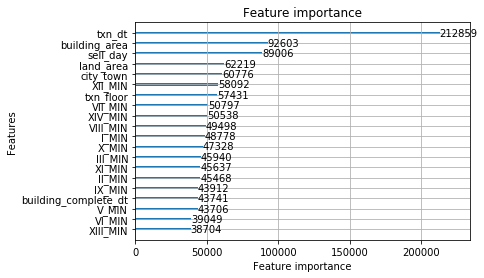

In [5]:
ax = model.plot_feature_important()

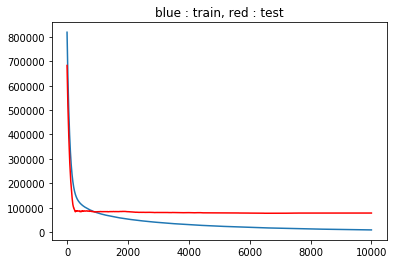

In [6]:
model.plot_loss()

In [7]:
y, y_true= model.predict(X_train,y_train)
hit_rate,point = score(y,y_true)
print(hit_rate)

first part : 9891.544486844748 last part: 0.9849495923925716
> 20 % : 0.0013556939144406506
0.9891544486844748


In [8]:
y, y_true= model.predict(X_test,y_test)
hit_rate,point = score(y,y_true)

first part : 5000.0 last part: 0.6796982311437473
> 20 % : 0.3333333333333333


In [9]:
hit_rate

0.5

In [10]:
test_df = pd.read_csv("data/test.csv")
build_id = pd.read_csv("data/submit_test.csv")['building_id']
test_df = dataloader.prepare_test_data(test_df)
display(test_df['death_rate'])
test_df = test_df.drop(['txn_dt_mon'],axis=1)
test_y, _= model.predict(test_df,y_test)
submit_df = pd.DataFrame(data={
    'building_id' : build_id,
    'total_price' : test_y
})
today = str(date.today())
submit_df.to_csv(f'submits/{today}_lightgbm.csv',index = False)

0        6.53
1        5.93
2        6.12
3        5.93
4        7.88
5        6.12
6        5.93
7        6.53
8        9.05
9        5.93
10       5.87
11       5.93
12       5.93
13       7.72
14       6.12
15       6.53
16       5.87
17       5.87
18       7.72
19       6.12
20       6.53
21       5.93
22       5.93
23       7.99
24       5.93
25       6.12
26       5.93
27       6.53
28       5.87
29       7.72
        ...  
9970     7.72
9971     5.93
9972     6.12
9973     7.72
9974     8.17
9975     7.72
9976     6.53
9977     5.93
9978     7.72
9979     5.93
9980     5.87
9981     5.93
9982     7.72
9983     6.12
9984     6.12
9985     6.53
9986     5.87
9987     5.93
9988     6.53
9989     5.93
9990     7.99
9991     7.72
9992     6.53
9993     6.53
9994     7.72
9995     7.88
9996     6.53
9997    10.40
9998     5.93
9999     7.72
Name: death_rate, Length: 10000, dtype: float64

In [11]:
X_test['y_predict'] = y
X_test['y_true'] = y_true
X_test.to_csv("data/X_test.csv",index = False)
    